In [2]:
# 1. 查询关键词搜索量/CPC	search_volume	判断是否值得投放
# 2. 相关关键词搜索量，无法设置返回数量,可以用5
# 3. keywords for site 指定网站（URL）自动生成关键词建议
# 4. 根据指定关键词、出价和设备类型，预测该关键词在 Google Ads 上的广告点击量、展示量、点击率、平均点击成本和预估花费。
# 5. 与该关键词语义相关的建议词（如 "bicycle for road"），及其搜索量、CPC、竞争度、SEO 难度、用户意图、SERP 类型等结构化数据,可以用limit限制返回数量，从dataforseo数据库中调取
# 6. 输入关键词、时间范围、地区，输出该关键词在 Google Trends 上的历史趋势数据（每周一个值，范围 0–100）


import base64
import requests
import json
import matplotlib.pyplot as plt

login = "metaljacket@meshinfo.cn"  
password = "d088821c1d6863ec"     
credentials = f"{login}:{password}" 

base64_creds = base64.b64encode(credentials.encode()).decode()
keyword = "road bicycle"


## 1. Google Search Volume API

**解释**: 获取关键词在 Google 上的搜索量数据(按月)

**输入**:
```json
{
  "keywords": ["road bicycle"],
  "location_name": "United States",
  "language_name": "English"
}
```

**输出**:
```json
  "result": [
        {
          "keyword": "road bicycle",
          "location_code": 2840,
          "language_code": "en",
          "search_partners": false,
          "competition": 1,
          "cpc": 1,
          "search_volume": 60500,
          "categories": null,
          "monthly_searches": [
            {
              "year": 2025,
              "month": 6,
              "search_volume": 74000
            },
            {
              "year": 2025,
              "month": 5,
              "search_volume": 74000
            },
            {
              "year": 2025,
              "month": 4,
              "search_volume": 49500
            },
            {
              "year": 2025,
              "month": 3,
              "search_volume": 49500
            },
            {
              "year": 2025,
              "month": 2,
              "search_volume": 33100
            },
            {
              "year": 2025,
              "month": 1,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 12,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 11,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 10,
              "search_volume": 49500
            },
            {
              "year": 2024,
              "month": 9,
              "search_volume": 60500
            },
            {
              "year": 2024,
              "month": 8,
              "search_volume": 74000
            },
            {
              "year": 2024,
              "month": 7,
              "search_volume": 90500
            }
          ]
```

In [2]:
# 1. 查询关键词 按月返回搜索量/CPC	search_volume	判断是否值得投放
url = "https://api.dataforseo.com/v3/keywords_data/google/search_volume/live"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Basic {base64_creds}"
}

# 请求体 - 设置关键词和区域
payload = [{
    "keywords": [keyword],
    "language_name": "English",
    "location_name": "United States"
}]

# 发起请求
response = requests.post(url, headers=headers, json=payload)

# 解析响应
if response.status_code == 200:
    search_volume = response.json()
    print(json.dumps(search_volume, indent=2))
else:
    print(f"Request failed: {response.status_code}")
    print(response.text)





{
  "version": "0.1.20250526",
  "status_code": 20000,
  "status_message": "Ok.",
  "time": "0.0798 sec.",
  "cost": 0.075,
  "tasks_count": 1,
  "tasks_error": 0,
  "tasks": [
    {
      "id": "07220436-1014-0093-0000-6b718ca5d894",
      "status_code": 20000,
      "status_message": "Ok.",
      "time": "0.0188 sec.",
      "cost": 0.075,
      "result_count": 1,
      "path": [
        "v3",
        "keywords_data",
        "google",
        "search_volume",
        "live"
      ],
      "data": {
        "api": "keywords_data",
        "function": "search_volume",
        "se": "google",
        "keywords": [
          "road bicycle"
        ],
        "language_name": "English",
        "location_name": "United States"
      },
      "result": [
        {
          "keyword": "road bicycle",
          "location_code": 2840,
          "language_code": "en",
          "search_partners": false,
          "competition": 1,
          "cpc": 1,
          "search_volume": 60500,
       

[{'keyword': 'road bicycle', 'location_code': 2840, 'language_code': 'en', 'search_partners': False, 'competition': 1, 'cpc': 1, 'search_volume': 60500, 'categories': None, 'monthly_searches': [{'year': 2025, 'month': 6, 'search_volume': 74000}, {'year': 2025, 'month': 5, 'search_volume': 74000}, {'year': 2025, 'month': 4, 'search_volume': 49500}, {'year': 2025, 'month': 3, 'search_volume': 49500}, {'year': 2025, 'month': 2, 'search_volume': 33100}, {'year': 2025, 'month': 1, 'search_volume': 40500}, {'year': 2024, 'month': 12, 'search_volume': 40500}, {'year': 2024, 'month': 11, 'search_volume': 40500}, {'year': 2024, 'month': 10, 'search_volume': 49500}, {'year': 2024, 'month': 9, 'search_volume': 60500}, {'year': 2024, 'month': 8, 'search_volume': 74000}, {'year': 2024, 'month': 7, 'search_volume': 90500}]}]


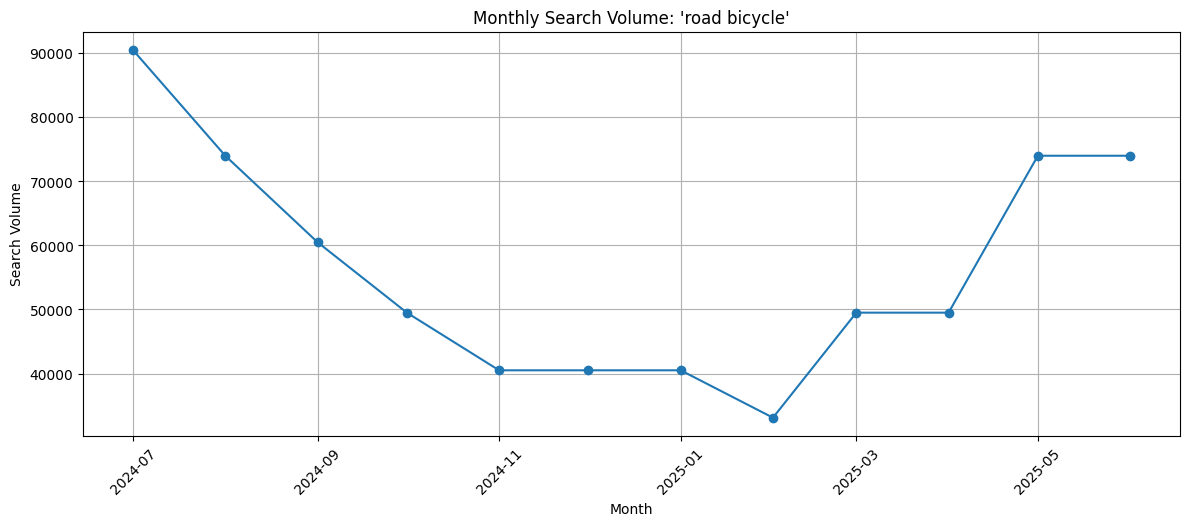

In [3]:

from datetime import datetime
sv_res = search_volume["tasks"][0]["result"]
print(sv_res)
monthly_data = sv_res[0]["monthly_searches"]
monthly_data.sort(key=lambda x: (x["year"], x["month"]))  # 确保按时间排序

dates = [datetime(x["year"], x["month"], 1) for x in monthly_data]
volumes = [x["search_volume"] for x in monthly_data]

# 绘图
plt.figure(figsize=(12, 5))
plt.plot(dates, volumes, marker='o')
plt.title("Monthly Search Volume: 'road bicycle'")
plt.xlabel("Month")
plt.ylabel("Search Volume")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## 2. Google Ads Keywords for Keywords API

**解释**: 获取与指定关键词相关的 Google Ads 关键词建议

**输入**:
```json
{
  "keywords": ["road bicycle"],
  "location_name": "United States",
  "language_name": "English",
  "include_serp_info": true,
  "include_seed_keyword": true,
  "limit": 10
}
```

**输出**:
```json
"result": [
        {
          "keyword": "road bicycle",
          "location_code": 2840,
          "language_code": "en",
          "search_partners": false,
          "competition": "HIGH",
          "competition_index": 100,
          "search_volume": 60500,
          "low_top_of_page_bid": 0.25,
          "high_top_of_page_bid": 1.49,
          "cpc": 1,
          "monthly_searches": [
            {
              "year": 2025,
              "month": 6,
              "search_volume": 74000
            },
            {
              "year": 2025,
              "month": 5,
              "search_volume": 74000
            },
            {
              "year": 2025,
              "month": 4,
              "search_volume": 49500
            },
            {
              "year": 2025,
              "month": 3,
              "search_volume": 49500
            },
            {
              "year": 2025,
              "month": 2,
              "search_volume": 33100
            },
            {
              "year": 2025,
              "month": 1,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 12,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 11,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 10,
              "search_volume": 49500
            },
            {
              "year": 2024,
              "month": 9,
              "search_volume": 60500
            },
            {
              "year": 2024,
              "month": 8,
              "search_volume": 74000
            },
            {
              "year": 2024,
              "month": 7,
              "search_volume": 90500
            }
          ],
          "keyword_annotations": {
            "concepts": null
          }
        },
        {
          "keyword": "road bike",
          "location_code": 2840,
          "language_code": "en",
          "search_partners": false,
          "competition": "HIGH",
          "competition_index": 100,
          "search_volume": 60500,
          "low_top_of_page_bid": 0.25,
          "high_top_of_page_bid": 1.49,
          "cpc": 1,
          "monthly_searches": [
            {
              "year": 2025,
              "month": 6,
              "search_volume": 74000
            },
            {
              "year": 2025,
              "month": 5,
              "search_volume": 74000
            },
            {
              "year": 2025,
              "month": 4,
              "search_volume": 49500
            },
            {
              "year": 2025,
              "month": 3,
              "search_volume": 49500
            },
            {
              "year": 2025,
              "month": 2,
              "search_volume": 33100
            },
            {
              "year": 2025,
              "month": 1,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 12,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 11,
              "search_volume": 40500
            },
            {
              "year": 2024,
              "month": 10,
              "search_volume": 49500
            },
            {
              "year": 2024,
              "month": 9,
              "search_volume": 60500
            },
            {
              "year": 2024,
              "month": 8,
              "search_volume": 74000
            },
            {
              "year": 2024,
              "month": 7,
              "search_volume": 90500
            }
          ],
          "keyword_annotations": {
            "concepts": [
              {
                "name": "Non-Brands",
                "concept_group": {
                  "name": "Non-Brands",
                  "type": "NON_BRAND"
                }
              },
              {
                "name": "street",
                "concept_group": {
                  "name": "Place",
                  "type": null
                }
              }
            ]
          }
        }
```


In [ ]:
# 2. 相关关键词搜索量，无法设置返回数量,可以用后面的5
url = "https://api.dataforseo.com/v3/keywords_data/google_ads/keywords_for_keywords/live"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Basic {base64_creds}"
}

# 请求体 - 设置关键词和区域
payload = [{
    "keywords": [keyword],
    "language_name": "English",
    "location_name": "United States"
}]

# 发起请求
response = requests.post(url, headers=headers, json=payload)

# 解析响应
if response.status_code == 200:
    search_volume = response.json()
    print(json.dumps(search_volume, indent=2))
else:
    print(f"Request failed: {response.status_code}")
    print(response.text)





{
  "version": "0.1.20250526",
  "status_code": 20000,
  "status_message": "Ok.",
  "time": "4.9586 sec.",
  "cost": 0.075,
  "tasks_count": 1,
  "tasks_error": 0,
  "tasks": [
    {
      "id": "07210606-1014-0368-0000-b3ab78b9fa84",
      "status_code": 20000,
      "status_message": "Ok.",
      "time": "4.9015 sec.",
      "cost": 0.075,
      "result_count": 1643,
      "path": [
        "v3",
        "keywords_data",
        "google_ads",
        "keywords_for_keywords",
        "live"
      ],
      "data": {
        "api": "keywords_data",
        "function": "keywords_for_keywords",
        "se": "google_ads",
        "keywords": [
          "road bicycle"
        ],
        "language_name": "English",
        "location_name": "United States"
      },
      "result": [
        {
          "keyword": "road bicycle",
          "location_code": 2840,
          "language_code": "en",
          "search_partners": false,
          "competition": "HIGH",
          "competition_index"

## 3. Google Ads Keywords for Site API

**解释**: 获取与指定网站相关的 Google Ads 关键词

**输入**:
```json
{
  "target": "example.com",
  "location_name": "United States",
  "language_name": "English",
  "include_serp_info": true,
  "limit": 10
}
```

**输出**:
```json
[{'keyword': 'road bike',
  'location_code': 2840,
  'language_code': 'en',
  'search_partners': False,
  'competition': 'HIGH',
  'competition_index': 100,
  'search_volume': 60500,
  'low_top_of_page_bid': 0.25,
  'high_top_of_page_bid': 1.49,
  'cpc': 1,
  'monthly_searches': [{'year': 2025, 'month': 6, 'search_volume': 74000},
   {'year': 2025, 'month': 5, 'search_volume': 74000},
   {'year': 2025, 'month': 4, 'search_volume': 49500},
   {'year': 2025, 'month': 3, 'search_volume': 49500},
   {'year': 2025, 'month': 2, 'search_volume': 33100},
   {'year': 2025, 'month': 1, 'search_volume': 40500},
   {'year': 2024, 'month': 12, 'search_volume': 40500},
   {'year': 2024, 'month': 11, 'search_volume': 40500},
   {'year': 2024, 'month': 10, 'search_volume': 49500},
   {'year': 2024, 'month': 9, 'search_volume': 60500},
   {'year': 2024, 'month': 8, 'search_volume': 74000},
   {'year': 2024, 'month': 7, 'search_volume': 90500}],
  'keyword_annotations': {'concepts': [{'name': 'Non-Brands',
     'concept_group': {'name': 'Non-Brands', 'type': 'NON_BRAND'}}]}},
 {'keyword': 'trek road bike',
...
    {'name': 'cycling', 'concept_group': {'name': 'Activity', 'type': None}},
    {'name': 'frame', 'concept_group': {'name': 'Component', 'type': None}},
    {'name': 'mountain bike',
     'concept_group': {'name': 'Bike', 'type': None}}]}},
 ...]
```

In [2]:
#3 keywords for site 给定网站（URL）返回关键词建议

url = "https://api.dataforseo.com/v3/keywords_data/google_ads/keywords_for_site/live"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Basic {base64_creds}"
}

# 请求体 
payload = [{
  "target": "https://www.trekbikes.com/us/en_US/bikes/road-bikes/",
  "location_name": "United States",
  "language_name": "English"
}]

# 发起请求
response = requests.post(url, headers=headers, json=payload).json()


# # 解析响应
# if response.status_code == 200:
#     search_volume = response.json()
#     print(json.dumps(search_volume, indent=2))
# else:
#     print(f"Request failed: {response.status_code}")
#     print(response.text)

In [3]:
response["tasks"][0]["result"]

[{'keyword': 'road bike',
  'location_code': 2840,
  'language_code': 'en',
  'search_partners': False,
  'competition': 'HIGH',
  'competition_index': 100,
  'search_volume': 60500,
  'low_top_of_page_bid': 0.25,
  'high_top_of_page_bid': 1.49,
  'cpc': 1,
  'monthly_searches': [{'year': 2025, 'month': 6, 'search_volume': 74000},
   {'year': 2025, 'month': 5, 'search_volume': 74000},
   {'year': 2025, 'month': 4, 'search_volume': 49500},
   {'year': 2025, 'month': 3, 'search_volume': 49500},
   {'year': 2025, 'month': 2, 'search_volume': 33100},
   {'year': 2025, 'month': 1, 'search_volume': 40500},
   {'year': 2024, 'month': 12, 'search_volume': 40500},
   {'year': 2024, 'month': 11, 'search_volume': 40500},
   {'year': 2024, 'month': 10, 'search_volume': 49500},
   {'year': 2024, 'month': 9, 'search_volume': 60500},
   {'year': 2024, 'month': 8, 'search_volume': 74000},
   {'year': 2024, 'month': 7, 'search_volume': 90500}],
  'keyword_annotations': {'concepts': [{'name': 'Non-Brand

## 4. Google Ads Ad Traffic by Keywords API

**解释**: 获取关键词的广告流量数据

**输入**:
```json
{
  "keywords": ["road bicycle"],
  "location_name": "United States",
  "language_name": "English",
  "include_serp_info": true,
  "include_seed_keyword": true,
  "limit": 10
}
```

**输出**:
```json
[{'keyword': None, 'location_code': 2840, 'language_code': 'en', 'date_interval': 'next_month', 'search_partners': False, 'bid': 999, 'match': 'broad', 'impressions': 3905.18, 'ctr': 0.125, 'average_cpc': 1.56, 'cost': 761.9, 'clicks': 487.97}]
```

In [ ]:
#4 根据指定关键词、出价和设备类型，预测该关键词在 Google Ads 上的广告点击量、展示量、点击率、平均点击成本和预估花费。

url = "https://api.dataforseo.com/v3/keywords_data/google_ads/ad_traffic_by_keywords/live"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Basic {base64_creds}"
}

# 请求体 
payload = [
    {
        "keywords": [keyword],
        "location_code": 2840,        # 美国
        "language_code": "en",        # 英语
        "device": "desktop",          # 可选：desktop, mobile, tablet
        "bid": 999,                   # 每次点击出价（单位：美元）
        "match": "broad"              # 匹配类型：broad, phrase, exact
    }
]
# 发起请求
response = requests.post(url, headers=headers, json=payload).json()
print(response["tasks"][0]["result"])


# # 解析响应
# if response.status_code == 200:
#     search_volume = response.json()
#     print(json.dumps(search_volume, indent=2))
# else:
#     print(f"Request failed: {response.status_code}")
#     print(response.text)

[{'keyword': None, 'location_code': 2840, 'language_code': 'en', 'date_interval': 'next_month', 'search_partners': False, 'bid': 999, 'match': 'broad', 'impressions': 3905.18, 'ctr': 0.125, 'average_cpc': 1.56, 'cost': 761.9, 'clicks': 487.97}]


## 5. DataForSEO Labs Keyword Suggestions API

**解释**: 获取关键词建议和相关概念,直接从dataforseo数据库调取

**输入**:
```json
{
  "keywords": ["road bicycle"],
  "language_name": "English",
  "location_name": "United States",
  "include_serp_info": true,
  "include_seed_keyword": true,
  "limit": 10
}
```

**输出**:
见图表


In [4]:
#5 与该关键词语义相关的建议词（如 "bicycle for road"），及其搜索量、CPC、竞争度、SEO 难度、用户意图、SERP 类型等结构化数据,可以用limit限制返回数量，从dataforseo数据库中调取

url = "https://api.dataforseo.com/v3/dataforseo_labs/google/keyword_suggestions/live"


# 请求体 
payload = [{
    "keyword": keyword,
    "language_name": "English",
    "location_name": "United States",
    "include_serp_info":True,
    "include_seed_keyword":True,
    "limit":2
}]
# 发起请求
response = requests.post(url, headers=headers, json=payload).json()
print(response["tasks"][0]["result"])


# # 解析响应
# if response.status_code == 200:
#     search_volume = response.json()
#     print(json.dumps(search_volume, indent=2))
# else:
#     print(f"Request failed: {response.status_code}")
#     print(response.text)

[{'se_type': 'google', 'seed_keyword': 'road bicycle', 'seed_keyword_data': {'se_type': 'google', 'keyword': 'road bicycle', 'location_code': 2840, 'language_code': 'en', 'keyword_info': {'se_type': 'google', 'last_updated_time': '2025-07-15 06:19:05 +00:00', 'competition': 1, 'competition_level': 'HIGH', 'cpc': 1, 'search_volume': 60500, 'low_top_of_page_bid': 0.25, 'high_top_of_page_bid': 1.49, 'categories': [10014, 10121, 10645, 11915, 13896], 'monthly_searches': [{'year': 2025, 'month': 6, 'search_volume': 74000}, {'year': 2025, 'month': 5, 'search_volume': 74000}, {'year': 2025, 'month': 4, 'search_volume': 49500}, {'year': 2025, 'month': 3, 'search_volume': 49500}, {'year': 2025, 'month': 2, 'search_volume': 33100}, {'year': 2025, 'month': 1, 'search_volume': 40500}, {'year': 2024, 'month': 12, 'search_volume': 40500}, {'year': 2024, 'month': 11, 'search_volume': 40500}, {'year': 2024, 'month': 10, 'search_volume': 49500}, {'year': 2024, 'month': 9, 'search_volume': 60500}, {'yea

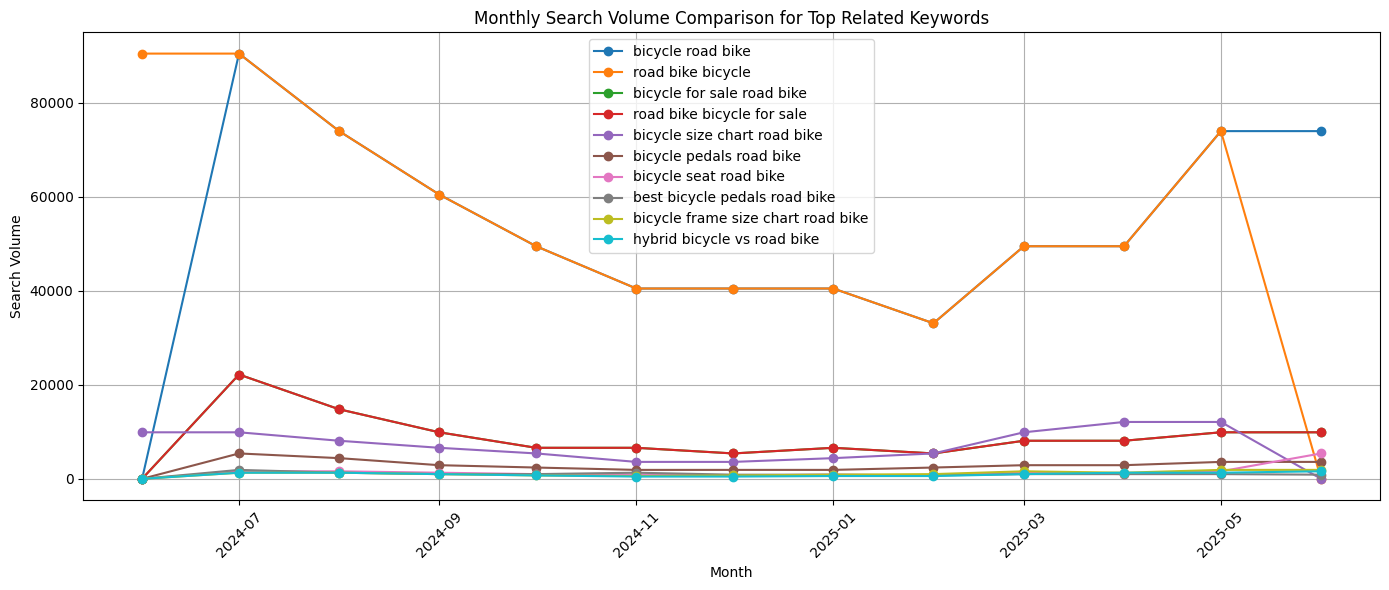

In [ ]:
ks_result = response["tasks"][0]["result"]
# 提取关键词的月度搜索量
items = ks_result[0]["items"]  # 每个 item 是一个 keyword 相关信息

# 提取并统一时间轴（时间按升序排列）
all_dates = set()
for item in items:
    for entry in item["keyword_info"]["monthly_searches"]:
        all_dates.add((entry["year"], entry["month"]))
sorted_dates = sorted(all_dates)
date_labels = [datetime(year, month, 1) for year, month in sorted_dates]

# 绘图
plt.figure(figsize=(14, 6))

for item in items:
    keyword = item["keyword"]
    monthly_data = { (e["year"], e["month"]): e["search_volume"] for e in item["keyword_info"]["monthly_searches"] }
    volumes = [monthly_data.get((dt.year, dt.month), 0) for dt in date_labels]
    plt.plot(date_labels, volumes, marker='o', label=keyword)

plt.title("Monthly Search Volume Comparison for Top Related Keywords")
plt.xlabel("Month")
plt.ylabel("Search Volume")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Google Trends Explore API

**解释**: 获取 Google Trends 趋势数据

**输入**:
```json
payload = [
    {
        "keywords": ["road bicycle"],     # ✅ 输入关键词（seed）
        "location_code": 2840,            # 美国
        "language_code": "en",
        "date_from": "2024-07-01",
        "date_to": "2025-07-01"
    }
]
```

**输出**:
```
见图表
```

In [11]:
#6 输入关键词、时间范围、地区，输出该关键词在 Google Trends 上的历史趋势数据（每周一个值，范围 0–100）
url = "https://api.dataforseo.com/v3/keywords_data/google_trends/explore/live"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Basic {base64_creds}"
}

# 请求体 
payload = [
    {
        "keywords": ["road bicycle"],     # ✅ 输入关键词（seed）
        "location_code": 2840,            # 美国
        "language_code": "en",
        "date_from": "2024-07-01",
        "date_to": "2025-07-01"
    }
]



response = requests.post(url, headers=headers, json=payload)
# 发起请求

result = response.json()

print(result)











{'version': '0.1.20250724', 'status_code': 20000, 'status_message': 'Ok.', 'time': '14.1097 sec.', 'cost': 0.009, 'tasks_count': 1, 'tasks_error': 0, 'tasks': [{'id': '07281113-1014-0173-0000-79483a7a02c1', 'status_code': 20000, 'status_message': 'Ok.', 'time': '14.0412 sec.', 'cost': 0.009, 'result_count': 1, 'path': ['v3', 'keywords_data', 'google_trends', 'explore', 'live'], 'data': {'api': 'keywords_data', 'function': 'explore', 'se': 'google_trends', 'keywords': ['road bicycle'], 'location_code': 2840, 'language_code': 'en', 'date_from': '2024-07-01', 'date_to': '2025-07-01'}, 'result': [{'keywords': ['road bicycle'], 'type': 'trends', 'location_code': 2840, 'language_code': 'en', 'check_url': 'https://trends.google.com/trends/explore?hl=en&geo=US&date=2024-07-01%202025-07-01&q=road%20bicycle', 'datetime': '2025-07-28 08:13:35 +00:00', 'items_count': 1, 'items': [{'position': 1, 'type': 'google_trends_graph', 'title': None, 'keywords': ['road bicycle'], 'data': [{'date_from': '202

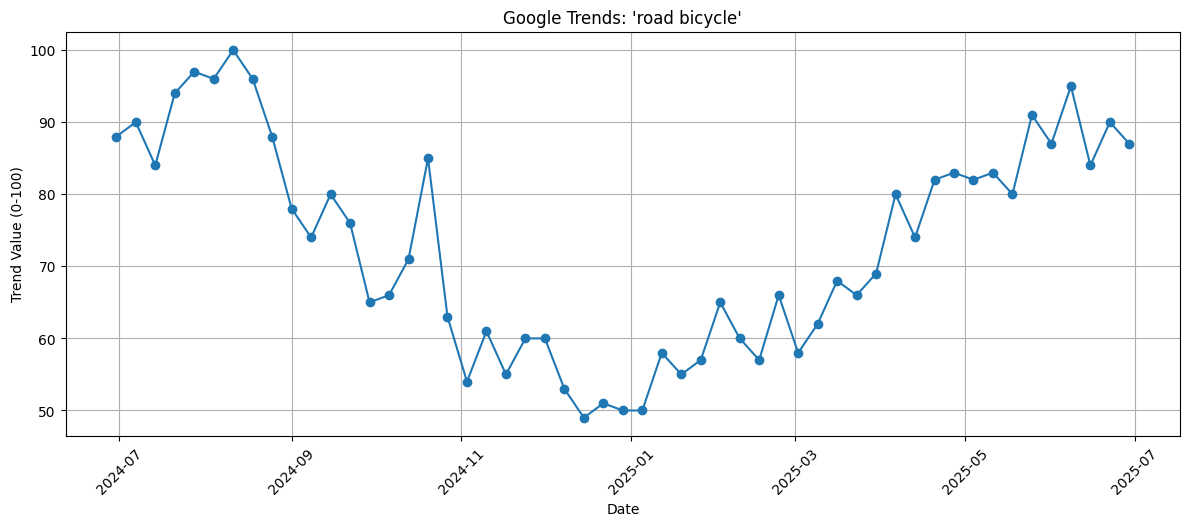

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime


trend_data = result["tasks"][0]["result"][0]["items"][0]["data"]

# 解析时间和趋势值
dates = [datetime.strptime(item["date_from"], "%Y-%m-%d") for item in trend_data]
values = [item["values"][0] for item in trend_data]

# 画图
plt.figure(figsize=(12, 5))
plt.plot(dates, values, marker='o')
plt.title("Google Trends: 'road bicycle'")
plt.xlabel("Date")
plt.ylabel("Trend Value (0-100)")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



In [6]:

url = "https://api.dataforseo.com/v3/dataforseo_labs/google/serp_competitors/live"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Basic {base64_creds}"
}

# 请求体 
payload = [
  {
    "keywords": [
      "road bike"
    ],
    "language_name": "English",
    "location_code": 2840,
    "item_types": ["organic"],
    "limit": 15
  }
]


response = requests.post(url, headers=headers, json=payload)
# 发起请求

result_search = response.json()


## Estimated traffic volume
表示指定关键词为网站带来的预估月流量，
计算方式为：将每个指定关键词的搜索量与其在搜索结果页（SERP）中对应排名位置的点击率（CTR）相乘，并将所有结果求和。
详细了解该指标的计算方法，请参阅帮助中心文章。

In [ ]:
items = result_search["tasks"][0]["result"][0]["items"]

for item in items:
    print(item["domain"], item["etv"]) #Estimated Traffic Volume

bikesonline.com 18392
www.canyon.com 9801
www.trekbikes.com 5886.65
www.specialized.com 3986.95
www.giant-bicycles.com 2837.45
buycycle.com 2044.8999999999999
www.reddit.com 1548.8000000000002
www.liv-cycling.com 907.5
en.wikipedia.org 683.65
www.rei.com 550.5500000000001
www.bikeexchange.com 453.75
www.cannondale.com 356.95
www.walmart.com 338.8
www.cyclingweekly.com 308.55
www.strictlybicycles.com 260.15
